In [1]:
import pandas as pd
import numpy as np
import concurrent.futures
import time
import glob

In [15]:
data=pd.read_csv("sorted_candidates_99_samples.csv")

In [16]:
data=data.iloc[:,1:]

In [17]:
genes=list(data.iloc[0:,0])

In [18]:
columns=list(data.columns.values)

In [19]:
data

,GSM2749296,GSM3530277,GSM5374079,GSM2652563,GSM4963877,GSM2343454,GSM3546072,GSM5239594,GSM3544809,GSM3549159,...,GSM3548684,GSM5149794,GSM4861282,GSM2343652,GSM4330931,GSM4477119,GSM2932792,GSM5374161,GSM3546332,GSM4225919
0,H4C3,FTH1,MT-CO2,MT-CYB,TPM4,MT-CO2,MT-CYB,ACTG1,SSR4,CD44,...,MT-CYB,MT-CO1,MT-ND4L,MT-CO3,EEF1A1,SSR4,EEF1A1,MT-CO2,SYCN,MIA3
1,MT-CO3,CD74,MT-CO3,MT-CO1,RPS3,MT-CO3,FAM240C,TMSB4X,MT-CO3,MT-CO3,...,MT-CO3,ACTG1,CLDN11,MT-CO2,MT-CO1,MT-CYB,RPL41,MT-CO1,MT-CYB,NSMAF
2,RPL41,TPT1,MT-CO1,MT-CO3,SLC3A2,MT-ND4L,MT-CO3,GNAS,MT-CO2,SYCN,...,MT-CO2,TMSB10,FTH1,MT-ND4L,TAGLN,MT-CO3,MT-CO1,MT-CO3,MT-CO3,BACE1
3,RPS8,ACTB,MT-ATP8,MT-CO2,SEPTIN7,MT-CO1,MT-ND2,ACTB,MT-CYB,SAT1,...,RPL41,TMSB4X,SAR1A,MT-CO1,MT-CO3,MT-CO1,MT-CO2,MT-ATP8,MT-ND2,MYH9
4,RPS4X,FAM83A,MT-ND4,MT-ND1,H4C14,MT-ATP6,MT-CO2,MT-CO2,RPL41,MT-CYB,...,MT-ND2,MT-CO2,FTL,MT-ND4,ACTG1,CD99,GPC3,MT-ND4,GALNT2,HMGCL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18947,TUBA1A,RPS2,ENO1,GAGE12F,AP1S1,RPS26,SELENOW,RPSA,HSPA1A,CHD2,...,NACA,RPL32,BICC1,RPS9,RPL4,NPM1,NME2,SLC6A8,VMP1,GPM6B
18948,SNRPD1,KDM6B,FXYD5,CKS2,MLPH,RPL18,ADSL,RPS3A,GAPDH,GET4,...,RPL23,TMEM175,LRRC75A,RPL11,LDHB,FXYD3,RPS16,EEF1B2,BLVRB,ZNF502
18949,UBE2T,NACA,EEF1B2,FOLH1,HMGN1,EEF1B2,LAMTOR5,RPS21,CRYBA2,CCNL1,...,SNRPB,RPL5,AREG,EEF1B2,RPS2,ITGAV,NQO1,ACTG1,PSMD5,BRD8
18950,RPSA,ZFP36,SLC6A8,RPS2,G6PD,ACTG1,PSMA2,BEX3,RPL26,ITGAV,...,GAPDH,USP7,DPYSL2,EEF1A1,RPL23,TMSB4X,RPS2,RPS9,PRDX5,MTHFD1


## Calculating rank

In [20]:
def rank_matrix(gene):
    gene_r_list=[]
    for col in columns:
        gene_r_list.append(data[col][data[col]==gene].index[0]+1)#get rank of each gene for each 
    return gene_r_list

In [21]:
start = time.perf_counter()

with concurrent.futures.ProcessPoolExecutor(max_workers=18) as executor:
    matrix=[]
    results = executor.map(rank_matrix, genes)
    for result in results:
        matrix.append(result)
    print("Generating rank matrix file")
    mat=np.asarray(matrix)
    final=pd.DataFrame(matrix,columns=columns,index=genes)
    rank_mat_name="rank_matrix_norm.csv"
    final.to_csv(rank_mat_name)
    print("Generating log_rank matrix")
    final_log=np.log(final)+1
    rank_mat_log_name="rank_matrix_log_norm.csv"
    final_log.to_csv(rank_mat_log_name)
    mat=np.asarray(final_log)
    print("Generating rank product")
    rp_mat=np.prod(mat[0:,0:len(columns)],axis=1)**(1/len(columns))
    final=pd.DataFrame(rp_mat,index=genes)
    final_name="rp_norm.csv"
    final.sort_values(by=0).to_csv(final_name)
        
finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Generating rank matrix file
Generating log_rank matrix
Generating rank product
Finished in 125.18 second(s)


In [9]:
start = time.perf_counter()

for file in files:
    print("loading file: "+str(file))
    data=pd.read_csv(file,index_col=[0])#loads scores
    columns=data.columns
    print("genes: %s\nsamples: %s"%(data.shape[0],data.shape[1]))
    
    with concurrent.futures.ProcessPoolExecutor(max_workers=15) as executor:
    
        results = executor.map(rank_matrix, genes)

        matrix=[]
        for result in results:
            matrix.append(result)
        print("Generating rank matrix for file %s " %file)
        mat=np.asarray(matrix,dtype="int64")
        final=pd.DataFrame(matrix,columns=columns,index=genes)
        rank_mat_name="rank_matrix_"+file.split(".")[0]+".csv"
        final.to_csv(rank_mat_name)
        print("Generating log_rank matrix for file %s " %file)
        final_log=np.log(final)+1
        rank_mat_log_name="rank_matrix_"+file.split(".")[0]+"_log.csv"
        final_log.to_csv(rank_mat_log_name)
        mat=np.asarray(final_log)
        print("Generating rank product for file %s " %file)
        rp_mat=np.prod(mat[0:,0:20],axis=1)**(1/20)
        final=pd.DataFrame(rp_mat,index=genes)
        final_name="rp_"+file.split(".")[0]+".csv"
        final.sort_values(by=0).to_csv(final_name)
        print("File %s successfull" %file)
        
finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

loading file: candidates_table_qnorm_raw_100-2.csv
genes: 25420
samples: 9


TypeError: must be str, not int

## Merging files and calculating final rank product

In [4]:
final_files=glob.glob("*.csv")#gets file names

In [5]:
final_files

['candidates_table_qnorm_raw_50-11.csv',
 'candidates_table_qnorm_raw_50-13.csv',
 'candidates_table_qnorm_raw_50-3.csv',
 'candidates_table_qnorm_raw_50-2.csv',
 'candidates_table_qnorm_raw_50-20.csv',
 'candidates_table_qnorm_raw_50-4.csv',
 'candidates_table_qnorm_raw_50-19.csv',
 'candidates_table_qnorm_raw_50-5.csv',
 'candidates_table_qnorm_raw_50-12.csv',
 'candidates_table_qnorm_raw_50-8.csv',
 'candidates_table_qnorm_raw_50-7.csv',
 'candidates_table_qnorm_raw_50-6.csv',
 'candidates_table_qnorm_raw_50-16.csv',
 'candidates_table_qnorm_raw_50-9.csv',
 'candidates_table_qnorm_raw_50-18.csv',
 'candidates_table_qnorm_raw_50-14.csv',
 'candidates_table_qnorm_raw_50-17.csv',
 'candidates_table_qnorm_raw_50-15.csv',
 'candidates_table_qnorm_raw_50-1.csv',
 'candidates_table_qnorm_raw_50-10.csv']

In [92]:
start = time.perf_counter()

with concurrent.futures.ProcessPoolExecutor(max_workers=15) as executor:
    results = executor.map(rank_matrix, genes[0:10])

    matrix=[]
    for result in results:
        matrix.append(result)
    print("Generating rank matrix...")
    mat=np.asarray(matrix,dtype="int64")
    #final=pd.DataFrame(matrix,columns=columns,index=genes)
    #rank_mat_name="rank_matrix_global_qnorm.csv"
    #final.to_csv(rank_mat_name)
    #print("Generating log_rank matrix")
    #final_log=np.log(final)+1
    #rank_mat_log_name="rank_matrix_global_log_qnorm.csv"
    #final_log.to_csv(rank_mat_log_name)
    #mat=np.asarray(final_log)
    #print("Generating rank product...")
    #rp_mat=np.prod(mat[0:,0:20],axis=1)**(1/20)
    #final=pd.DataFrame(rp_mat,index=genes)
    #final_name="rp_final_candidates_qnorm.csv"
    #final.sort_values(by=0).to_csv(final_name)
    #print("Done")
        
finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Generating rank matrix...
Finished in 0.24 second(s)


In [93]:
matrix

[[1,
  173,
  256,
  69,
  292,
  216,
  421,
  120,
  57,
  283,
  3,
  39,
  950,
  180,
  110,
  7,
  4527,
  129,
  281,
  64],
 [2,
  23,
  68,
  221,
  207,
  214,
  182,
  2,
  35,
  18,
  1,
  21,
  614,
  306,
  312,
  2,
  4816,
  64,
  321,
  364],
 [3,
  11863,
  480,
  8304,
  552,
  2770,
  12070,
  8019,
  1159,
  8478,
  8501,
  9579,
  1373,
  1262,
  8877,
  11792,
  267,
  261,
  9272,
  185],
 [4,
  1419,
  54,
  2007,
  371,
  126,
  3018,
  1320,
  38,
  613,
  2157,
  132,
  292,
  4,
  725,
  560,
  320,
  130,
  304,
  254],
 [5,
  1536,
  1085,
  762,
  1310,
  1847,
  1158,
  161,
  4211,
  747,
  167,
  316,
  6004,
  3734,
  298,
  201,
  452,
  662,
  2464,
  2317],
 [6,
  380,
  129,
  417,
  249,
  88,
  406,
  72,
  196,
  116,
  405,
  37,
  131,
  103,
  53,
  127,
  591,
  244,
  215,
  44],
 [7,
  11495,
  350,
  11755,
  2156,
  2250,
  11788,
  4842,
  852,
  6535,
  11677,
  57,
  1530,
  4632,
  691,
  1822,
  3884,
  2213,
  1795,
  4032],
 [8,

In [76]:
data1.head()

,GSM1160113,GSM1406528,GSM2343893,GSM1867010,GSM2902792,GSM1631493,GSM2107717,GSM1241139,GSM2325082,GSM2482840,GSM2343438,GSM1328164,GSM2584551,GSM2845393,GSM1553203,GSM2026973,GSM1665946,GSM2228469,GSM1193922,GSM1631272
0,YPEL5,KRT18,RPL18A,EEF1A2,TUBA1B,RPL19,ATF5,PSAT1,ADARB1,MME,MT-ND4L,RPL19,RPL19,EEF1A2,RPL17,MKI67,RPL19,TM4SF1,FRMD6,EP300
1,BOD1,SPTSSB,RPL19,RPL19,NCL,TSC22D3,RPL19,EIF1,RPL19,PRUNE2,RPL19,EEF1A2,BSG,SLC7A2,RPL19,RPL19,ITGB1,RPS26,PHLDB2,RP11-371A22.1
2,PSMA2,SULF2,RPLP2,BSG,RPL19,SLC1A5,CD79A,PHLDB2,JUN,STEAP2,DDIT4,STEAP2,RPL6,CD24,ZNF711,PRKDC,SSR3,RPL17,SSR3,PLS3
3,CALM1,GREB1,SRM,NCL,TAGLN2,PSAT1,UBE2J1,SLC38A2,BSG,RPL19,HSP90B1,NKX3-1,SLC1A5,SULF2,SLC1A5,ZNF711,NCL,PRDX4,TM4SF1,PRKDC
4,EIF1,ATP1A1,HIST1H2BK,IER3,EMP1,BSG,ARHGDIB,RPL21,CA2,EPPK1,SLC1A5,LIMCH1,DDOST,KRT18,BSG,SMC1A,RGS4,RPL10A,NCL,TSC22D3


In [41]:
data2=pd.read_csv("lp_7.csv",index_col=0)

In [42]:
data2.head()

,GSM2411141,GSM1528198,GSM2343540,GSM2902782,GSM2309515,GSM2343497,GSM1202554,GSM2026911,GSM2152851,GSM1939637,GSM2474243,GSM2152850,GSM1833439,GSM2011522,GSM2343129,GSM2080901,GSM2411154,GSM1861610,GSM2344385,GSM2287056
0,RPL19,SLC38A5,MT-ND4L,TUBA1B,TTI2,MT-ND4L,MKI67,PLLP,ASS1,CD24,RPL19,RPL31,MAPK9,FOXE3,GLUL,LPAR4,SLC7A5,FAM46C,ALDOA,STMN2
1,NCL,RPS11,MT-ATP8,FCRLA,TMC5,HBE1,CENPF,RIMBP3C,BASP1,ATP1A1,NCL,RPL18A,WDR74,HSPA1A,RPL19,PRKACB,PIM3,CDR1,PIM1,SNRPN
2,ARHGDIB,GLRX,SLC25A37,RPL19,RPL17,SLC25A37,FRMD6,RPL19,RPL31,CDH1,SLC38A2,RPS14,NPM1,RPL19,RPS18,MME,IER3,TUBA1C,RPL19,TUBA1A
3,IL2RG,RPL19,RPS11,FADS2,HINT3,ALDOA,HIF1A,TOP2A,H1FX,SLC1A5,AKAP12,RPL41,NCL,NCL,GSTP1,EHF,CD69,UHRF1,HBE1,MARCH6
4,SEPT9,UPP1,ALDOA,COTL1,RPL18A,PIM1,PLEC,PRKDC,EDF1,SLC7A2,EZR,SLC25A6,RPL19,ATP1A1,TUBA1B,NKX3-1,ATHL1,TACC3,SLC25A37,ACVR2A


In [75]:
data1.merge(data2,how="outer",left_index=True,right_index=True,copy=False)

,GSM1160113,GSM1406528,GSM2343893,GSM1867010,GSM2902792,GSM1631493,GSM2107717,GSM1241139,GSM2325082,GSM2482840,...,GSM2474243,GSM2152850,GSM1833439,GSM2011522,GSM2343129,GSM2080901,GSM2411154,GSM1861610,GSM2344385,GSM2287056
0,YPEL5,KRT18,RPL18A,EEF1A2,TUBA1B,RPL19,ATF5,PSAT1,ADARB1,MME,...,RPL19,RPL31,MAPK9,FOXE3,GLUL,LPAR4,SLC7A5,FAM46C,ALDOA,STMN2
1,BOD1,SPTSSB,RPL19,RPL19,NCL,TSC22D3,RPL19,EIF1,RPL19,PRUNE2,...,NCL,RPL18A,WDR74,HSPA1A,RPL19,PRKACB,PIM3,CDR1,PIM1,SNRPN
2,PSMA2,SULF2,RPLP2,BSG,RPL19,SLC1A5,CD79A,PHLDB2,JUN,STEAP2,...,SLC38A2,RPS14,NPM1,RPL19,RPS18,MME,IER3,TUBA1C,RPL19,TUBA1A
3,CALM1,GREB1,SRM,NCL,TAGLN2,PSAT1,UBE2J1,SLC38A2,BSG,RPL19,...,AKAP12,RPL41,NCL,NCL,GSTP1,EHF,CD69,UHRF1,HBE1,MARCH6
4,EIF1,ATP1A1,HIST1H2BK,IER3,EMP1,BSG,ARHGDIB,RPL21,CA2,EPPK1,...,EZR,SLC25A6,RPL19,ATP1A1,TUBA1B,NKX3-1,ATHL1,TACC3,SLC25A37,ACVR2A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25415,MT-ND1,EEF2,RPS2,EEF2,HNRNPA1,MT-CO1,MT-CO1,MT-CYB,RACK1,RPL13A,...,EEF1A1,RPLP0,CDK6,ENO1,RPS3A,HSPA8,LCK,TUBB8,RPLP0,SOX4
25416,MT-CO2,EEF1A1,EEF1A1,MT-CO2,MT-CO1,RACK1,HNRNPA1,TMBIM6,EEF1A1,FOLH1,...,RPLP0,RPL13A,TAF1D,EEF2,RIMBP3C,MT-ND4,TRBC1,TUBB8P12,MT-CO1,DPYSL2
25417,MT-CO1,MT-CO2,HBG2,MT-ND2,AHNAK,RPL4,MT-ND4,EEF1A1,EEF2,ACTB,...,MT-ATP6,RPS3,RPSA,HSPA1B,FTL,EEF2,MT-ND4,PROSER1,MT-ND4,STMN1
25418,MT-ND4,KRT8,RPLP0,MT-CO1,EEF1A1,EEF1A1,MT-CO2,MT-CO2,MT-CO1,EEF1A1,...,MT-ND4,RPS19,RPS3A,MT-CO1,RPLP0,MT-CO1,MT-CO1,NLRP4,HBG2,MAP1B


In [71]:
new_df.iloc[0:5,19:40]

,GSM1631272,GSM2411141,GSM1528198,GSM2343540,GSM2902782,GSM2309515,GSM2343497,GSM1202554,GSM2026911,GSM2152851,...,GSM2474243,GSM2152850,GSM1833439,GSM2011522,GSM2343129,GSM2080901,GSM2411154,GSM1861610,GSM2344385,GSM2287056
0,EP300,RPL19,SLC38A5,MT-ND4L,TUBA1B,TTI2,MT-ND4L,MKI67,PLLP,ASS1,...,RPL19,RPL31,MAPK9,FOXE3,GLUL,LPAR4,SLC7A5,FAM46C,ALDOA,STMN2
1,RP11-371A22.1,NCL,RPS11,MT-ATP8,FCRLA,TMC5,HBE1,CENPF,RIMBP3C,BASP1,...,NCL,RPL18A,WDR74,HSPA1A,RPL19,PRKACB,PIM3,CDR1,PIM1,SNRPN
2,PLS3,ARHGDIB,GLRX,SLC25A37,RPL19,RPL17,SLC25A37,FRMD6,RPL19,RPL31,...,SLC38A2,RPS14,NPM1,RPL19,RPS18,MME,IER3,TUBA1C,RPL19,TUBA1A
3,PRKDC,IL2RG,RPL19,RPS11,FADS2,HINT3,ALDOA,HIF1A,TOP2A,H1FX,...,AKAP12,RPL41,NCL,NCL,GSTP1,EHF,CD69,UHRF1,HBE1,MARCH6
4,TSC22D3,SEPT9,UPP1,ALDOA,COTL1,RPL18A,PIM1,PLEC,PRKDC,EDF1,...,EZR,SLC25A6,RPL19,ATP1A1,TUBA1B,NKX3-1,ATHL1,TACC3,SLC25A37,ACVR2A


In [9]:
mat=np.asarray(matrix,dtype="int64")

In [10]:
final=pd.DataFrame(matrix,columns=columns,index=genes)

In [11]:
final.head(10)

,GSM1160113,GSM1406528,GSM2343893,GSM1867010,GSM2902792,GSM1631493,GSM2107717,GSM1241139,GSM2325082,GSM2482840,GSM2343438,GSM1328164,GSM2584551,GSM2845393,GSM1553203,GSM2026973,GSM1665946,GSM2228469,GSM1193922,GSM1631272
YPEL5,1,472,1303,3751,2556,1378,922,316,2238,1110,964,1945,2479,596,1657,2797,2845,854,1618,641
BOD1,2,1031,2256,2782,4284,1073,3790,4637,1641,2419,3812,3408,1704,1742,1231,2202,3619,3255,1799,1906
PSMA2,3,413,369,379,136,853,438,134,734,1154,631,288,482,855,323,551,400,293,306,743
CALM1,4,8,271,54,42,95,111,116,98,101,965,32,34,15,24,84,46,813,28,84
EIF1,5,302,30,227,278,11,53,2,19,28,14,816,69,142,62,120,205,294,121,13
FAM46C,6,985,1854,5305,3392,4559,5579,1528,2232,4021,1292,3250,2610,2500,1764,2734,6923,285,4714,1289
BACH1,7,2023,2033,1914,1151,390,457,279,1382,270,286,548,951,1806,1533,479,970,555,1216,293
TSG101,8,933,1123,941,1024,1544,1699,504,1881,786,1176,948,908,823,1478,1728,1807,432,952,1352
ZFPM2,9,6482,917,5188,6135,2678,4882,1011,2987,4031,979,4587,2389,5649,2976,2801,6013,12304,3502,3822
CCZ1B,10,2332,2430,2605,3501,4603,2602,2852,4365,2980,2876,3551,3542,1595,4504,5372,3034,5809,3733,2722


In [12]:
final.to_csv("rank_matrix.csv")

In [13]:
final=pd.read_csv("rank_matrix.csv",index_col=0)

In [14]:
final.head()

,GSM1160113,GSM1406528,GSM2343893,GSM1867010,GSM2902792,GSM1631493,GSM2107717,GSM1241139,GSM2325082,GSM2482840,GSM2343438,GSM1328164,GSM2584551,GSM2845393,GSM1553203,GSM2026973,GSM1665946,GSM2228469,GSM1193922,GSM1631272
YPEL5,1,472,1303,3751,2556,1378,922,316,2238,1110,964,1945,2479,596,1657,2797,2845,854,1618,641
BOD1,2,1031,2256,2782,4284,1073,3790,4637,1641,2419,3812,3408,1704,1742,1231,2202,3619,3255,1799,1906
PSMA2,3,413,369,379,136,853,438,134,734,1154,631,288,482,855,323,551,400,293,306,743
CALM1,4,8,271,54,42,95,111,116,98,101,965,32,34,15,24,84,46,813,28,84
EIF1,5,302,30,227,278,11,53,2,19,28,14,816,69,142,62,120,205,294,121,13


In [15]:
final_log=np.log(final)+1

In [16]:
final_log.head()

,GSM1160113,GSM1406528,GSM2343893,GSM1867010,GSM2902792,GSM1631493,GSM2107717,GSM1241139,GSM2325082,GSM2482840,GSM2343438,GSM1328164,GSM2584551,GSM2845393,GSM1553203,GSM2026973,GSM1665946,GSM2228469,GSM1193922,GSM1631272
YPEL5,1.000000,7.156979,8.172425,9.229778,8.846199,8.228388,7.826545,6.755742,8.713338,8.012115,7.871091,8.573017,8.815611,7.390241,8.412764,8.936303,8.953318,7.749931,8.388946,7.463029
BOD1,1.693147,7.938284,8.721349,8.930925,9.362642,7.978214,9.240121,9.441823,8.403061,8.791110,9.245909,9.133881,8.440734,8.462789,8.115582,8.697121,9.193953,9.087948,8.494986,8.552762
PSMA2,2.098612,7.023448,6.910797,6.937536,5.912655,7.748760,7.082219,5.897840,7.598509,8.050989,7.447306,6.662960,7.177944,7.751101,6.777652,7.311735,6.991465,6.680173,6.723585,7.610696
CALM1,2.386294,3.079442,6.602119,4.988984,4.737670,5.553877,5.709530,5.753590,5.584967,5.615121,7.872128,4.465736,4.526361,3.708050,4.178054,5.430817,4.828641,7.700731,4.332205,5.430817
EIF1,2.609438,6.710427,4.401197,6.424950,6.627621,3.397895,4.970292,1.693147,3.944439,4.332205,3.639057,7.704414,5.234107,5.955827,5.127134,5.787492,6.323010,6.683580,5.795791,3.564949


In [17]:
final_log.to_csv("final_rank_log.csv")

In [18]:
l=list(final_log.index.values)

In [19]:
set([x for x in l if l.count(x) > 1])

set()

In [20]:
mat=np.asarray(final_log)

In [21]:
mat[0:2,0:2]

array([[1.        , 7.15697899],
       [1.69314718, 7.93828448]])

In [22]:
np.prod(mat[0:2,0:2],axis=1)

array([ 7.15697899, 13.44068399])

In [23]:
np.prod(mat,axis=1)**(1/20)

array([ 7.34395398,  8.04901189,  6.63145869, ..., 11.14130431,
       11.13428202, 11.1357397 ])

In [24]:
mat.shape

(25420, 20)

In [25]:
start = time.perf_counter()
rp_mat=np.prod(mat[0:,0:20],axis=1)**(1/20)
finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Finished in 0.0 second(s)


In [26]:
final=pd.DataFrame(rp_mat,index=genes)

In [27]:
final.head(10)

,0
YPEL5,7.343954
BOD1,8.049012
PSMA2,6.631459
CALM1,4.946307
EIF1,4.764339
FAM46C,8.268044
BACH1,7.254673
TSG101,7.603058
ZFPM2,8.650803
CCZ1B,8.636905


In [28]:
final.sort_values(by=0).head(30)

,0
RPL19,2.113360
BSG,3.514039
NCL,3.797920
SLC1A5,4.170172
RPL17,4.202304
DDOST,4.490206
RAD21,4.565433
RPL15,4.596101
RPL31,4.704315
PRKDC,4.712697


In [73]:
final.sort_values(by=0).to_csv("lp_9.csv")

In [74]:
cand=pd.read_csv("rrp_eg_bs32_ds50_final_candidates_2.csv",names=["rp"])

In [75]:
cand.head()

,rp
NaN,0.000000
RPL19,1.437037
SLC1A5,2.543660
RPS14,2.821073
RPN2,2.859408


In [76]:
cand=pd.read_csv("rrp_eg_bs32_ds50_final_candidates_2.csv",index_col=0,names=["rp"],header=0)


In [77]:
cand.head()

,rp
RPL19,1.437037
SLC1A5,2.543660
RPS14,2.821073
RPN2,2.859408
BSG,3.210471


In [78]:
cand.shape

(25420, 1)

In [79]:
l=list(cand.index.values)



In [80]:
set([x for x in l if l.count(x) > 1])

set()

In [37]:
cand.loc["Mar/01"]

,rp
Mar/01,9.068545
Mar/01,9.068545


In [32]:
len(cand.index.values)

25420

In [49]:
class ranking_p():
    
    def __init__(self,data):
        self.data=data
        self.genes=data.iloc[:,0].values
        self.k=len(data.columns)
        self.result=dict()
        self.result_long=dict()
      
    def rp_calculate(self):
               
        for gene in self.genes:
            gene_r_list=[]
            for col in self.data.columns:
                gene_r_list.append(self.data[col][data[col]==gene].index[0]+1)
                #self.result.update({gen:np.product(gen_r_list)**(1/self.k)})
                self.result_long.update({gene:gene_r_list})
        
        self.rank_matrix=pd.DataFrame(self.result_long).T
        #self.rank_product=pd.Series(self.result)
    

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

In [36]:
sorted_genes=final.sort_values(by=0).head(100)

In [37]:
sorted_genes[0]

SLC1A5     4.167592
ATP1A1     4.334307
RPN2       4.642332
BSG        4.766282
RPL31      4.878089
             ...   
RCAN1      6.497661
SND1       6.507976
EMC1       6.510689
P4HA1      6.512460
HERPUD1    6.514641
Name: 0, Length: 100, dtype: float64

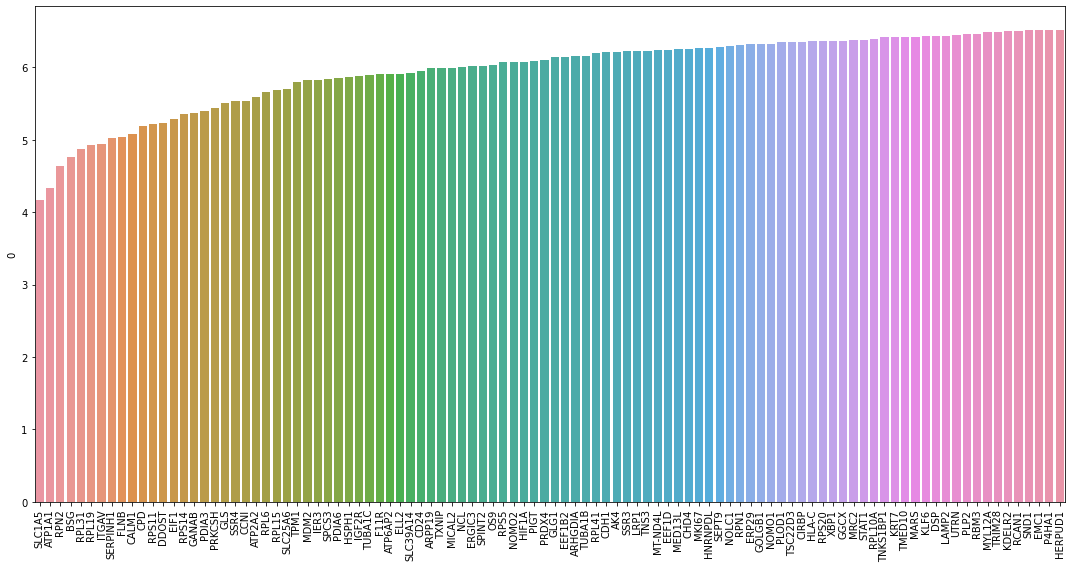

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genes.index.values,y=sorted_genes[0])
plt.xticks(rotation=90)
plt.tight_layout()

In [26]:
rp_mat=np.prod(mat[0:,200:],axis=1)**(1/200)

In [27]:
final=pd.DataFrame(rp_mat,index=genes)

In [28]:
final.sort_values(by=0).head(20)

,0
APP,3.408653
SEC61A1,4.617956
RRBP1,4.641374
RPN1,4.744537
LMAN1,4.777828
HDLBP,4.899666
ANXA5,4.926340
ATP2A2,4.935976
RPL19,4.994923
NOMO1,5.014208


In [29]:
final.sort_values(by=0).to_csv("final_rp_200_400.csv")

In [ ]:
def rp_calculate():
    for gene in genes:
            gene_r_list=[]
            for col in self.data.columns:
                gene_r_list.append(self.data[col][data[col]==gene].index[0]+1)
                #self.result.update({gen:np.product(gen_r_list)**(1/self.k)})
                self.result_long.update({gene:gene_r_list})
        
        self.rank_matrix=pd.DataFrame(self.result_long).T
        #self.rank_product=pd.Series(self.result)

In [197]:
start = time.perf_counter()
with concurrent.futures.ThreadPoolExecutor(max_workers=6000) as executor:
    genes=np.asarray(data.iloc[:,0].values)
    futures =[executor.submit(rank_matrix, gene) for gene in genes]
    
    results=[]
    for f in concurrent.futures.as_completed(futures):
        results.append(f.result())
        
finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Finished in 68.98 second(s)


In [198]:
start = time.perf_counter()
with concurrent.futures.ProcessPoolExecutor(max_workers=12) as executor:
    genes=np.asarray(data.iloc[:,0].values)
    futures =[executor.submit(rank_matrix, gene) for gene in genes]
    
    results=[]
    for f in concurrent.futures.as_completed(futures):
        results.append(f.result())
        
finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Finished in 8.01 second(s)


In [160]:
results[0]

[14422]

In [138]:
results

[1, 178, 718, 1466, 227, 35, 189, 56, 206]

In [127]:
with concurrent.futures.ProcessPoolExecutor() as executor:
    future=executor.submit(rank_matrix,("APP"))
    results=future.result()

In [128]:
results

[23, 2, 5, 4, 2, 14, 9, 100, 1]

In [62]:
matrix=pd.DataFrame(result_long).T

In [116]:
gene_r_list

[]

In [74]:
result_long

{}

In [57]:
matrix.head()

""


In [22]:
rp=ranking_p(data)

In [23]:
len(rp.genes)

21180

In [24]:
rp.k

9

In [ ]:
matrix=rp.rank_matrix

In [ ]:
matrix.head()

In [ ]:
matrix.shape

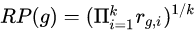

In [14]:
class rankin_p():
    
    def __init__(self,data_list):
        self.data_list = data_list
        self.summary_table=pd.concat(self.data_list,axis=1,sort=True)
    
        
    def rp_calculate(self):
        
        def rpf(r_gi,k): #rp_calculate_function from wikipedia
            RP_value=np.product(r_gi**(1/k))
            return RP_value
        
        rp_list=[]
        
        for i in self.summary_table.index:
            k = len(self.summary_table.loc[i])
            rp_list.append(rpf(self.summary_table.loc[i],k))
        self.summary_table['RP']= rp_list
        return self.summary_table

In [15]:
A= rankin_p([matrix])

In [17]:
final=A.rp_calculate()

In [18]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,RP
AKAP12,21171,7665,15974,15,21077,21155,21010,20893,607,21084,...,6879,21080,17287,13,21164,8111,21037,6366,21101,8597.303437
ANPEP,176,7522,7508,11736,445,34,1576,1231,8818,129,...,3374,75,183,4681,9,41,197,6984,770,682.652825
ANXA5,52,327,126,28,24,51,89,350,70,42,...,94,34,56,117,20,49,59,203,77,66.584366
APOC4-APOC2,12849,13402,7234,8140,5686,14412,12706,12216,14587,9139,...,5945,10167,5075,7273,6607,382,175,13877,13361,4519.394091
APP,1,23,2,5,4,2,14,9,100,1,...,6300,2,93,84,8,113,6,6348,17,21.088463


In [23]:
final.shape

(131, 401)

In [20]:
last=final.sort_values(by="RP")

In [22]:
last.to_csv("last.csv")

In [5]:
import concurrent.futures
import time

start = time.perf_counter()


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return f'Done Sleeping...{seconds}'


with concurrent.futures.ProcessPoolExecutor() as executor:
    results = [executor.submit(do_something, 1) for _ in range(40)]
    
for f in concurrent.futures.as_completed(results):
    print(f.result())
    
    

finish = time.perf_counter()

print(f'Finished in {round(finish-start, 2)} second(s)')

Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Sleeping 1 second(s)...
Done Sleeping...1
Done Sleeping...1
Done